In [1]:
import pandas as pd
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import os
import re


In [2]:
out_dir = "output"
os.makedirs(out_dir, exist_ok=True)

In [3]:
clinical_data_all = pd.read_csv('./output/clinical_data_all.csv')

### All Slides: ROI Clusters

In [4]:
adata_pt = sc.read_h5ad("/data/projects/robin/segmentation/xenium_outs/adata_polygon_reduced_pseudotime_X26updated_with_quadrants_with_clusters.h5ad")
adata_pt

AnnData object with n_obs × n_vars = 782 × 480
    obs: 'Disease', 'dpt_pseudotime', 'quadrant', 'Sample_ID', 'KMeans_cluster'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Disease_colors', 'KMeans_cluster_colors', 'diffmap_evals', 'draw_graph', 'hvg', 'iroot', 'log1p', 'neighbors', 'pca'
    obsm: 'X_diffmap', 'X_draw_graph_fr', 'X_pca'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [5]:
pc1 = adata_pt.obsm["X_pca"][:,0]
pc2 = adata_pt.obsm["X_pca"][:,1]

adata_pt.obs['PC1'] = pc1
adata_pt.obs['PC2'] = pc2

In [6]:
df_pt = adata_pt.obs.copy()
df_pt.rename(columns={"dpt_pseudotime": "Pseudotime"}, inplace=True)
df_pt

,Disease,Pseudotime,quadrant,Sample_ID,KMeans_cluster,PC1,PC2
polygon_flags,,,,,,,
0_0011216_ANCA_X17,ANCA,0.444406,1,X17,C3,0.512626,-0.018312
0_0011216_ANCA_X18,ANCA,0.598062,2,X18,C4,1.136992,-0.016451
0_0011216_ANCA_X19,ANCA,0.620515,2,X19,C4,1.170726,-0.407808
0_0011216_ANCA_X20,ANCA,0.416691,1,X20,C3,0.467239,-0.057754
0_0011216_GBM_X21,GBM,0.833587,3,X21,C4,1.585127,-0.721576
...,...,...,...,...,...,...,...
9_0011762_Cntrl_X1,Cntrl,0.105040,0,X1,C2,-0.456176,0.451678
9_0018775_ANCA_X58,ANCA,0.479633,2,X58,C3,0.685558,0.137973
9_0018775_ANCA_X60,ANCA,0.326151,1,X60,C2,-0.361374,-0.203304


In [7]:
# Remove rows with ',' in the index values
df_pt = df_pt[~df_pt.index.str.contains(',')]

df_pt = df_pt.reset_index()
df_pt

,polygon_flags,Disease,Pseudotime,quadrant,Sample_ID,KMeans_cluster,PC1,PC2
0,0_0011216_ANCA_X17,ANCA,0.444406,1,X17,C3,0.512626,-0.018312
1,0_0011216_ANCA_X18,ANCA,0.598062,2,X18,C4,1.136992,-0.016451
2,0_0011216_ANCA_X19,ANCA,0.620515,2,X19,C4,1.170726,-0.407808
3,0_0011216_ANCA_X20,ANCA,0.416691,1,X20,C3,0.467239,-0.057754
4,0_0011216_GBM_X21,GBM,0.833587,3,X21,C4,1.585127,-0.721576
...,...,...,...,...,...,...,...,...
777,9_0011762_Cntrl_X1,Cntrl,0.105040,0,X1,C2,-0.456176,0.451678
778,9_0018775_ANCA_X58,ANCA,0.479633,2,X58,C3,0.685558,0.137973
779,9_0018775_ANCA_X60,ANCA,0.326151,1,X60,C2,-0.361374,-0.203304
780,9_0018775_ANCA_X63,ANCA,0.947872,3,X63,C4,1.345954,-0.554141


In [8]:
df_pt[['Glom_no', 'Slide_ID', 'Disease', 'Biopsy_ID']] = df_pt['polygon_flags'].str.split('_', expand=True)
df_pt = df_pt.drop(columns=['polygon_flags'])
df_pt

,Disease,Pseudotime,quadrant,Sample_ID,KMeans_cluster,PC1,PC2,Glom_no,Slide_ID,Biopsy_ID
0,ANCA,0.444406,1,X17,C3,0.512626,-0.018312,0,0011216,X17
1,ANCA,0.598062,2,X18,C4,1.136992,-0.016451,0,0011216,X18
2,ANCA,0.620515,2,X19,C4,1.170726,-0.407808,0,0011216,X19
3,ANCA,0.416691,1,X20,C3,0.467239,-0.057754,0,0011216,X20
4,GBM,0.833587,3,X21,C4,1.585127,-0.721576,0,0011216,X21
...,...,...,...,...,...,...,...,...,...,...
777,Cntrl,0.105040,0,X1,C2,-0.456176,0.451678,9,0011762,X1
778,ANCA,0.479633,2,X58,C3,0.685558,0.137973,9,0018775,X58
779,ANCA,0.326151,1,X60,C2,-0.361374,-0.203304,9,0018775,X60
780,ANCA,0.947872,3,X63,C4,1.345954,-0.554141,9,0018775,X63


In [9]:
df_summary = (
    df_pt.groupby('Biopsy_ID')
    .agg(
        Total_gloms_on_biopsy=('Pseudotime', 'count'),  # Count the number of rows in each group
        Median_PC1=('PC1', 'median')     # Calculate the median Pseudotime
    )
    .reset_index()  # Reset the index for a clean DataFrame
)

df_summary


,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X1,36,-0.564160
1,X10,64,-0.776936
2,X12,3,0.523362
3,X13,12,1.078501
4,X14,10,0.391004
5,X15,7,-0.474816
6,X16,9,0.197557
7,X17,14,0.365794
8,X18,5,0.673121
9,X19,5,1.112875


In [10]:
df_summary['Total_gloms_on_biopsy'].sum()

782

In [11]:
clinical_data_all.head()

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass
0,X6,81,männlich,0.010,1.2,55.00,ANCA,ARRS low (0/11)
1,X3,55,weiblich,0.440,1.6,35.00,ANCA,ARRS medium (2/11)
2,X4,59,männlich,1.200,2.4,28.26,ANCA,ARRS medium (2/11)
3,X17,72,weiblich,0.425,1.1,49.93,ANCA,ARRS low (0/11)
4,X25,52,männlich,3.250,3.7,17.59,ANCA,ARRS high (8/11)


In [12]:
merged_df = pd.merge(clinical_data_all, df_summary, left_on='biopsy_nr', right_on='Biopsy_ID')
merged_df

,biopsy_nr,age,sex,albuminuria_gg,serum_creatinine,eGFR,disease,ARRscore_SLEclass,Biopsy_ID,Total_gloms_on_biopsy,Median_PC1
0,X6,81,männlich,0.010,1.20,55.000000,ANCA,ARRS low (0/11),X6,5,-0.181733
1,X3,55,weiblich,0.440,1.60,35.000000,ANCA,ARRS medium (2/11),X3,10,0.273051
2,X4,59,männlich,1.200,2.40,28.260000,ANCA,ARRS medium (2/11),X4,7,-0.102901
3,X17,72,weiblich,0.425,1.10,49.930000,ANCA,ARRS low (0/11),X17,14,0.365794
4,X25,52,männlich,3.250,3.70,17.590000,ANCA,ARRS high (8/11),X25,5,0.754072
5,X27,46,männlich,0.760,4.70,13.740000,ANCA,ARRS medium (5/11),X27,15,0.959444
6,X18,43,männlich,NaN,3.30,21.520000,ANCA,ARRS medium (2/11),X18,5,0.673121
7,X33,65,männlich,NaN,NaN,NaN,ANCA,na,X33,10,0.171400
8,X28,47,männlich,NaN,2.58,28.170000,ANCA,ARRS medium (2/11),X28,4,0.406449
9,X50,24,weiblich,NaN,0.63,125.070000,ANCA,ARRS low (0/11),X50,5,0.409695


In [13]:
merged_df.to_csv('./output/ClinicalData_medianPC1.csv', index=False)

### Scatter Plot: Sequentially orderd biopsy IDs

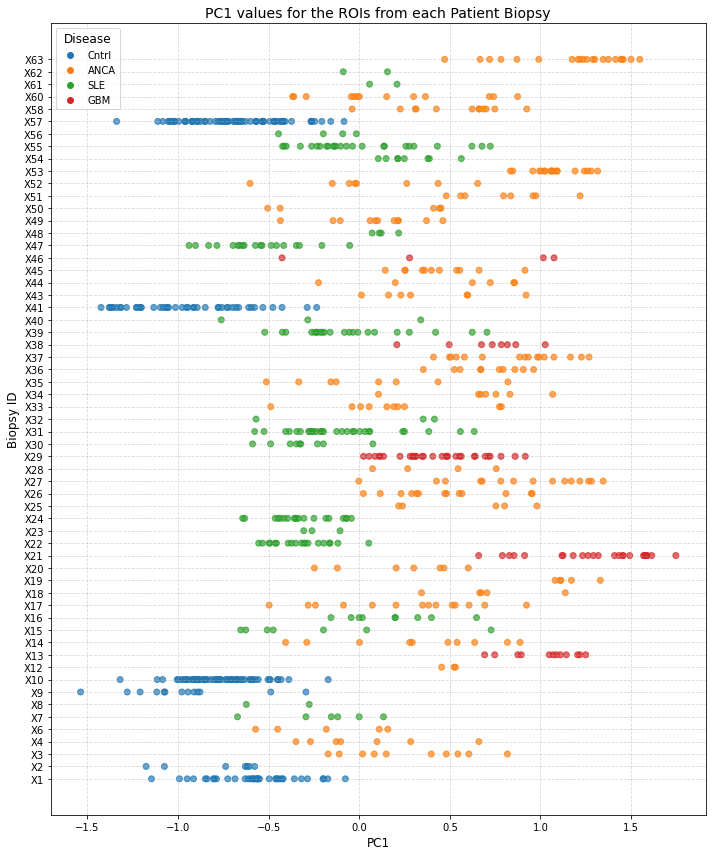

In [14]:
# Arrange Biopsy_ID alphanumerically based on the numeric part
df_pt['Biopsy_Num'] = df_pt['Biopsy_ID'].apply(lambda x: int(re.search(r'\d+', x).group()))
df_pt = df_pt.sort_values(by='Biopsy_Num')

# Assign a unique color to each Disease
unique_diseases = df_pt['Disease'].unique()
color_map = {disease: color for disease, color in zip(unique_diseases, plt.cm.tab10.colors[:len(unique_diseases)])}

# Map the colors to Disease
df_pt['Color'] = df_pt['Disease'].map(color_map)

# Scatter plot
plt.figure(figsize=(10, 12))  
#plt.scatter(df_pt['Pseudotime'], df_pt['Biopsy_ID'], c=df_pt['Color'], alpha=0.7, edgecolor='k')
plt.scatter(df_pt['PC1'], df_pt['Biopsy_ID'], c=df_pt['Color'], alpha=0.7)


# Add labels and title
plt.xlabel('PC1', fontsize=12)
plt.ylabel('Biopsy ID', fontsize=12)
plt.title('PC1 values for the ROIs from each Patient Biopsy', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', label=disease) 
           for disease, color in color_map.items()]
plt.legend(handles=handles, title='Disease', fontsize=10, title_fontsize=12)

# Show plot
plt.tight_layout()



plt.show()


### Scatter Plot: Ordered by disease

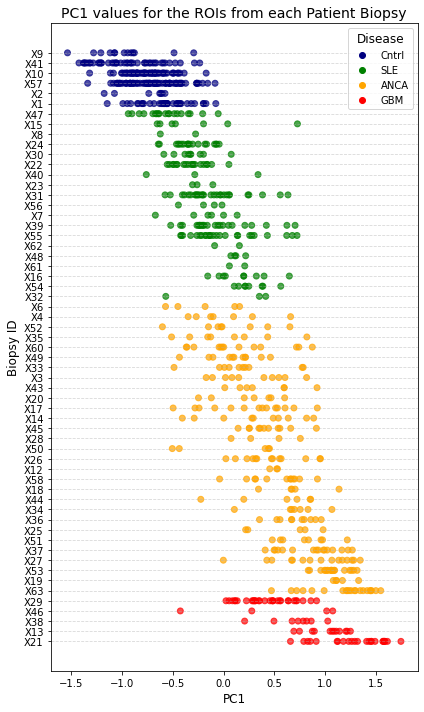

In [15]:
disease_order = ['Cntrl', 'SLE', 'ANCA', 'GBM']
df_pt['Disease'] = pd.Categorical(df_pt['Disease'], categories=disease_order, ordered=True)

# Dictionary to assign a unique color to each Disease
color_map = {'Cntrl': 'navy', 'SLE': 'green', 'ANCA': 'orange', 'GBM': 'red'}
df_pt['Color'] = df_pt['Disease'].map(color_map)

# Compute median PC1 for each Biopsy_ID
# Only compute and merge median PC1 if not already present
if 'PC1_Median' not in df_pt.columns:
    Median_PC1 = df_pt.groupby('Biopsy_ID')['PC1'].median().reset_index()
    df_pt = df_pt.merge(Median_PC1, on='Biopsy_ID', suffixes=('', '_Median'))

# Sort by Disease type and then by median PC1
df_pt.sort_values(['Disease', 'PC1_Median'], ascending=[True, True], inplace=True)

# Get sorted Biopsy_IDs for y-axis in top-down order
sorted_biopsies = df_pt['Biopsy_ID'].unique()[::-1]  # Reverse for plotting

# Map Biopsy_ID to y-axis positions
biopsy_y_positions = {biopsy: i for i, biopsy in enumerate(sorted_biopsies)}
df_pt['y_pos'] = df_pt['Biopsy_ID'].map(biopsy_y_positions)

# Scatter plot
plt.figure(figsize=(6, 10))
plt.scatter(df_pt['PC1'], df_pt['y_pos'], c=df_pt['Color'], alpha=0.7)

# Set y-ticks to display sorted Biopsy_ID labels
plt.yticks(ticks=list(biopsy_y_positions.values()), labels=list(biopsy_y_positions.keys()))

# Add labels and title
plt.xlabel('PC1', fontsize=12)
plt.ylabel('Biopsy ID', fontsize=12)
plt.title('PC1 values for the ROIs from each Patient Biopsy', fontsize=14)
#plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Only show horizontal grid lines


# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', label=disease) 
           for disease, color in color_map.items()]
plt.legend(handles=handles, title='Disease', fontsize=10, title_fontsize=12)
       
# Define the quadrant boundaries and labels
#These are the quadrant cutoffs now: [0.0, 0.29085383, 0.46684304, 0.7301055, 1.0]
#Before: [0.0, 0.35824525, 0.552939, 0.7679471, 1.0]
#quadrant_boundaries = [0.29, 0.46, 0.73]
#quadrant_labels = ['Q1 = 0.29', 'Q2 = 0.46', 'Q3 = 0.73']

# Add vertical lines and in-plot labels
#for x, label in zip(quadrant_boundaries, quadrant_labels):
#    plt.axvline(x=x, color='gray', linestyle='--', linewidth=1)
#    plt.text(x+0.005, -2.25, label, ha='left', va='bottom', fontsize=9, color='gray', rotation=90)


# Show plot
plt.tight_layout()


save_path_base = os.path.join(out_dir, 'PC1_Scatter_perPatient_DiseaseColors')

# Save as PNG
plt.savefig(f"{save_path_base}.png", format='png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
# Save as PDF
plt.savefig(f"{save_path_base}.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')                        
                         
                         
plt.show()


In [16]:
df_pt.KMeans_cluster.unique()

['C1', 'C2', 'C3', 'C4']
Categories (4, object): ['C1', 'C2', 'C3', 'C4']

### Scatter Plot: Ordered by disease, coloured by cluster

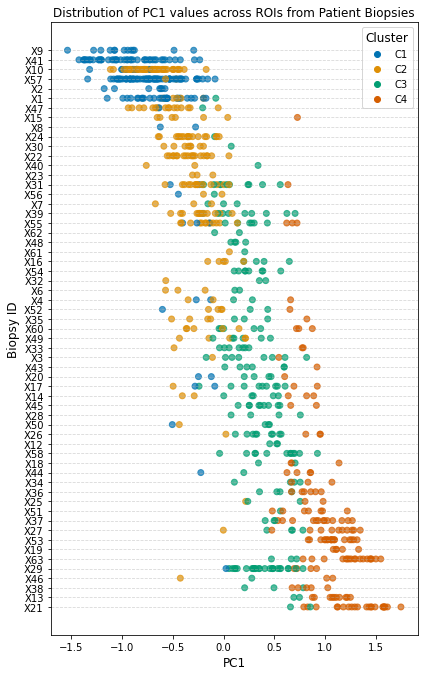

In [26]:
disease_order = ['Cntrl', 'SLE', 'ANCA', 'GBM']
df_pt['Disease'] = pd.Categorical(df_pt['Disease'], categories=disease_order, ordered=True)


# Dictionary to assign a unique color to each quadrant
#['#1f77b4', '#ff7f0e', '#279e68', '#d62728']
#color_map = {'C1': 'yellow', 'C2': 'orange', 'C3': 'red', 'C4': 'maroon'}
#color_map = {'C1': '#9bcfe6', 'C2': '#007bba', 'C3': '#d7f2c5', 'C4': '#00a300'}
color_map = {'C1': '#0173B2', 'C2': '#DE8F05', 'C3': '#029E73', 'C4': '#D55E00'}
df_pt['Color'] = df_pt['KMeans_cluster'].map(color_map)


# Compute median PC1 for each Biopsy_ID
# Only compute and merge median PC1 if not already present
if 'PC1_Median' not in df_pt.columns:
    Median_PC1 = df_pt.groupby('Biopsy_ID')['PC1'].median().reset_index()
    df_pt = df_pt.merge(Median_PC1, on='Biopsy_ID', suffixes=('', '_Median'))

# Sort by Disease type and then by median PC1
df_pt.sort_values(['Disease', 'PC1_Median'], ascending=[True, True], inplace=True)

# Get sorted Biopsy_IDs for y-axis in top-down order
sorted_biopsies = df_pt['Biopsy_ID'].unique()[::-1]  # Reverse for plotting

# Map Biopsy_ID to y-axis positions
biopsy_y_positions = {biopsy: i for i, biopsy in enumerate(sorted_biopsies)}
df_pt['y_pos'] = df_pt['Biopsy_ID'].map(biopsy_y_positions)

# Scatter plot
plt.figure(figsize=(6, 9.5))
plt.scatter(df_pt['PC1'], df_pt['y_pos'], c=df_pt['Color'], alpha=0.7)

# Set y-ticks to display sorted Biopsy_ID labels
plt.yticks(ticks=list(biopsy_y_positions.values()), labels=list(biopsy_y_positions.keys()))

# Add labels and title
plt.xlabel('PC1', fontsize=12)
plt.ylabel('Biopsy ID', fontsize=12)
plt.title("Distribution of PC1 values across ROIs from Patient Biopsies", fontsize=12)

#plt.grid(True, linestyle='--', alpha=0.5)
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Only show horizontal grid lines


# Add a legend
handles = [plt.Line2D([0], [0], marker='o', color=color, linestyle='', label=disease) 
           for disease, color in color_map.items()]
plt.legend(handles=handles, title='Cluster', fontsize=10, title_fontsize=12)
       


# Show plot
plt.tight_layout()


save_path_base = os.path.join(out_dir, 'PC1_Scatter_perPatient_ClusterColors')

# Save as PNG
plt.savefig(f"{save_path_base}.png", format='png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
# Save as PDF
plt.savefig(f"{save_path_base}.pdf", format='pdf', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')


plt.show()


### Box Plot: Ordered by disease

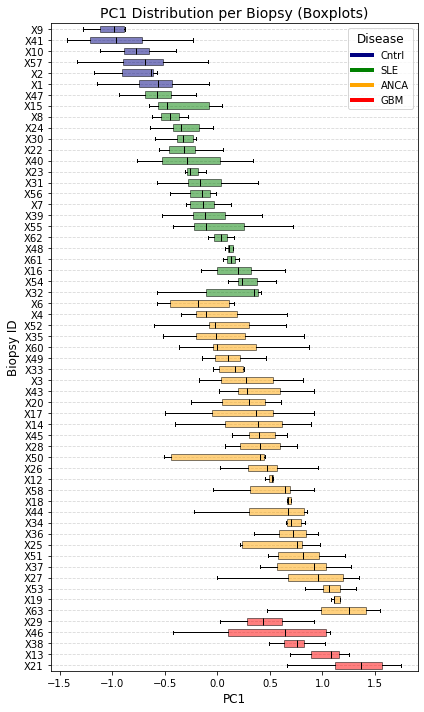

In [18]:
# Define disease order
disease_order = ['Cntrl', 'SLE', 'ANCA', 'GBM']
df_pt['Disease'] = pd.Categorical(df_pt['Disease'], categories=disease_order, ordered=True)
# Create color map per Disease
color_map = {'Cntrl': 'navy', 'SLE': 'green', 'ANCA': 'orange', 'GBM': 'red'}
df_pt['Color'] = df_pt['Disease'].map(color_map)

# Compute median PC1 per biopsy
if 'PC1_Median' not in df_pt.columns:
    Median_PC1 = df_pt.groupby('Biopsy_ID')['PC1'].median().reset_index()
    df_pt = df_pt.merge(Median_PC1, on='Biopsy_ID', suffixes=('', '_Median'))

# Sort by disease and median PC1
df_pt.sort_values(['Disease', 'PC1_Median'], ascending=[True, True], inplace=True)
sorted_biopsies = df_pt['Biopsy_ID'].unique()[::-1]

# Setup y-position mapping
biopsy_y_positions = {biopsy: i for i, biopsy in enumerate(sorted_biopsies)}
df_pt['y_pos'] = df_pt['Biopsy_ID'].map(biopsy_y_positions)

# Plotting
plt.figure(figsize=(6, 10))

# Plot boxplots per biopsy
for biopsy in sorted_biopsies:
    data = df_pt[df_pt['Biopsy_ID'] == biopsy]
    ypos = biopsy_y_positions[biopsy]
    box = plt.boxplot(data['PC1'],
                      positions=[ypos],
                      vert=False,
                      patch_artist=True,
                      widths=0.6,
                      boxprops=dict(facecolor=color_map[data['Disease'].iloc[0]], alpha=0.5),
                      medianprops=dict(color='black'),
                      showfliers=False)

    # Add standard deviation as a horizontal line
    #mean = data['PC1'].mean()
    #std = data['PC1'].std()
    #plt.hlines(y=ypos, xmin=mean - std, xmax=mean + std, color='black', linestyle='-', linewidth=2)

# Set y-ticks to biopsy labels
plt.yticks(ticks=list(biopsy_y_positions.values()), labels=list(biopsy_y_positions.keys()))

# Axes labels and title
plt.xlabel('PC1', fontsize=12)
plt.ylabel('Biopsy ID', fontsize=12)
plt.title('PC1 Distribution per Biopsy (Boxplots)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
handles = [plt.Line2D([0], [0], color=color, lw=4, label=disease) for disease, color in color_map.items()]
plt.legend(handles=handles, title='Disease', fontsize=10, title_fontsize=12)

# Save and show
plt.tight_layout()
save_path = os.path.join(out_dir, 'PC1_Boxplot_perPatient.png')
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()


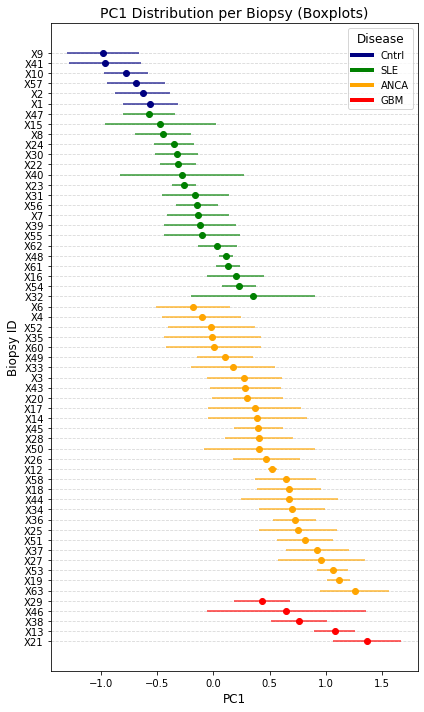

In [19]:
# Define disease order
disease_order = ['Cntrl', 'SLE', 'ANCA', 'GBM']
df_pt['Disease'] = pd.Categorical(df_pt['Disease'], categories=disease_order, ordered=True)
# Create color map per Disease
color_map = {'Cntrl': 'navy', 'SLE': 'green', 'ANCA': 'orange', 'GBM': 'red'}
df_pt['Color'] = df_pt['Disease'].map(color_map)

# Compute median PC1 per biopsy
if 'PC1_Median' not in df_pt.columns:
    Median_PC1 = df_pt.groupby('Biopsy_ID')['PC1'].median().reset_index()
    df_pt = df_pt.merge(Median_PC1, on='Biopsy_ID', suffixes=('', '_Median'))

# Sort by disease and median PC1
df_pt.sort_values(['Disease', 'PC1_Median'], ascending=[True, True], inplace=True)
sorted_biopsies = df_pt['Biopsy_ID'].unique()[::-1]

# Setup y-position mapping
biopsy_y_positions = {biopsy: i for i, biopsy in enumerate(sorted_biopsies)}
df_pt['y_pos'] = df_pt['Biopsy_ID'].map(biopsy_y_positions)

# Plotting
plt.figure(figsize=(6, 10))

# Plot median points and SD lines per biopsy
for biopsy in sorted_biopsies:
    data = df_pt[df_pt['Biopsy_ID'] == biopsy]
    ypos = biopsy_y_positions[biopsy]

    if len(data) == 0:
        continue

    median = data['PC1'].median()
    std = data['PC1'].std()
    color = color_map[data['Disease'].iloc[0]]

    # Plot SD as horizontal line
    plt.hlines(y=ypos, xmin=median - std, xmax=median + std, color=color, linewidth=2, alpha=0.6)

    # Plot median as a point
    plt.plot(median, ypos, marker='o', color=color, markersize=6)


# Set y-ticks to biopsy labels
plt.yticks(ticks=list(biopsy_y_positions.values()), labels=list(biopsy_y_positions.keys()))

# Axes labels and title
plt.xlabel('PC1', fontsize=12)
plt.ylabel('Biopsy ID', fontsize=12)
plt.title('PC1 Distribution per Biopsy (Boxplots)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Legend
handles = [plt.Line2D([0], [0], color=color, lw=4, label=disease) for disease, color in color_map.items()]
plt.legend(handles=handles, title='Disease', fontsize=10, title_fontsize=12)

# Save and show
plt.tight_layout()
save_path = os.path.join(out_dir, 'PC1_PointnLine_perPatient.png')
plt.savefig(save_path, format='png', dpi=300, bbox_inches='tight', transparent=False, facecolor='white')
plt.show()


In [20]:
## Table with count median, mean, sd of PC1 for each patient

In [21]:
# Filter only rows with valid PC1 values
valid_df = df_pt[df_pt['PC1'].notna()]

# Make sure each Biopsy_ID has a unique Disease (sanity check)
biopsy_disease_map = valid_df[['Biopsy_ID', 'Disease']].drop_duplicates()

# Compute stats
summary_df = valid_df.groupby('Biopsy_ID')['PC1'].agg(
    Count='count',
    Median='median',
    Mean='mean',
    SD='std'
).reset_index()

# Merge in Disease info (so we only get biopsy IDs with data)
summary_df = summary_df.merge(biopsy_disease_map, on='Biopsy_ID', how='left')
summary_df

,Biopsy_ID,Count,Median,Mean,SD,Disease
0,X1,36,-0.564160,-0.573319,0.244551,Cntrl
1,X10,64,-0.776936,-0.760349,0.194604,Cntrl
2,X12,3,0.523362,0.503002,0.042077,ANCA
3,X13,12,1.078501,1.028016,0.184560,GBM
4,X14,10,0.391004,0.324775,0.440887,ANCA
5,X15,7,-0.474816,-0.241661,0.493869,SLE
6,X16,9,0.197557,0.175571,0.252456,SLE
7,X17,14,0.365794,0.256176,0.412170,ANCA
8,X18,5,0.673121,0.704645,0.282734,ANCA
9,X19,5,1.112875,1.160248,0.100363,ANCA


In [22]:
summary_df = summary_df.sort_values(['Disease', 'Median'], ascending=[True, True])


summary_df[['Count','Median', 'Mean', 'SD']] = summary_df[['Count','Median', 'Mean', 'SD']].round(3)
summary_df['Label'] = summary_df['Biopsy_ID'].astype(str) + ' (' + summary_df['Disease'].astype(str) + ')'
summary_df.set_index('Label', inplace=True)
summary_df

,Biopsy_ID,Count,Median,Mean,SD,Disease
Label,,,,,,
X9 (Cntrl),X9,13,-0.979,-0.975,0.320,Cntrl
X41 (Cntrl),X41,44,-0.965,-0.948,0.318,Cntrl
X10 (Cntrl),X10,64,-0.777,-0.760,0.195,Cntrl
X57 (Cntrl),X57,72,-0.691,-0.689,0.259,Cntrl
X2 (Cntrl),X2,7,-0.629,-0.774,0.247,Cntrl
X1 (Cntrl),X1,36,-0.564,-0.573,0.245,Cntrl
X47 (SLE),X47,19,-0.573,-0.564,0.231,SLE
X15 (SLE),X15,7,-0.475,-0.242,0.494,SLE
X8 (SLE),X8,2,-0.449,-0.449,0.246,SLE


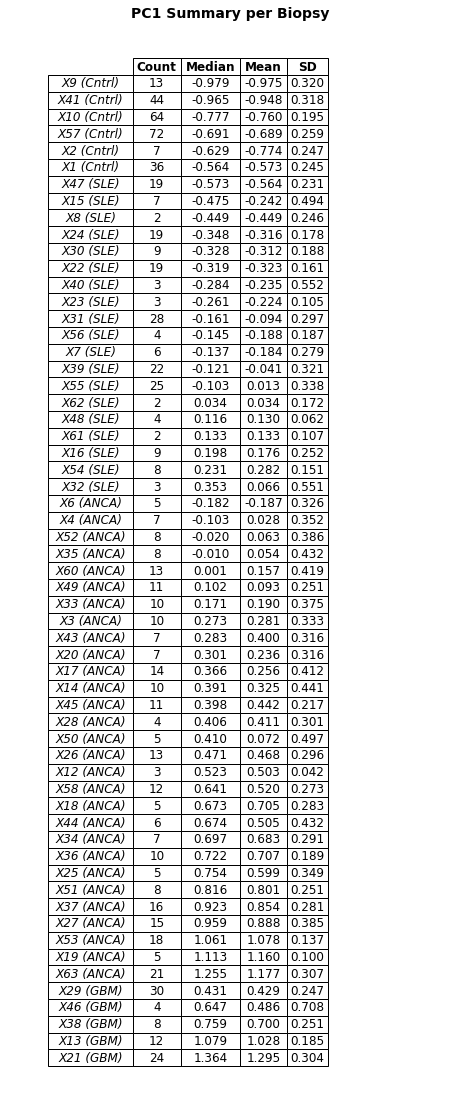

In [23]:
table_df = summary_df[['Count','Median', 'Mean', 'SD']].copy()

# Format numeric values as strings
table_df['Count'] = table_df['Count'].astype(int)
table_df['Median'] = table_df['Median'].map('{:.3f}'.format)
table_df['Mean'] = table_df['Mean'].map('{:.3f}'.format)
table_df['SD'] = table_df['SD'].map('{:.3f}'.format)


# Plot table
fig, ax = plt.subplots(figsize=(8, len(table_df) / 3))
ax.axis('off')

table = ax.table(
    cellText=table_df.values,
    colLabels=table_df.columns,
    rowLabels=table_df.index,
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(12)
table.auto_set_column_width(col=list(range(len(table_df.columns) + 1)))
table.scale(1.4, 1.4)

for (row, col), cell in table.get_celld().items():
    cell.set_text_props(ha='center')
    if row == 0:
        cell.set_text_props(fontweight='bold', fontsize=12)
    if col == -1:
        cell.set_text_props(fontstyle='italic')

plt.title("PC1 Summary per Biopsy", fontsize=14, weight='bold', pad=10)

# Save
plt.savefig(os.path.join(out_dir, 'PC1_SummaryTable_perPatient.pdf'), bbox_inches='tight')
plt.show()

In [24]:
table_df['Count'].sum()

782